In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.__version__

'0.0.26'

In [3]:
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/notebooks'

In [4]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [5]:
# Read in B cell data
%time bdata = sc.read_h5ad('h5ad/combined_dec_bcells.h5ad')
# subset to only D0 
bdata = bdata[(bdata.obs['Collection_Day'] == 'D0')& (bdata.obs['bcr_QC_pass'] == 'True')].copy()
bdata

CPU times: user 7.98 s, sys: 940 ms, total: 8.92 s
Wall time: 27.3 s


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


AnnData object with n_obs × n_vars = 43841 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [6]:
# subset to each severity  classification
from collections import defaultdict
adata = defaultdict(dict)
vdj = defaultdict(dict)

In [7]:
# subset each status and place it in adata
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical', 'Non_covid', 'LPS']:
    adata[x] = bdata[bdata.obs['Status_on_day_collection_summary'] == x].copy()

In [8]:
vdj_files = {"Critical":'dandelion_output/combined_dec_bcell_vdj_critical.h5',
             "Severe":'dandelion_output/combined_dec_bcell_vdj_severe.h5',
             "Moderate":'dandelion_output/combined_dec_bcell_vdj_moderate.h5',
             "Mild":'dandelion_output/combined_dec_bcell_vdj_mild.h5',
             "LPS":'dandelion_output/combined_dec_bcell_vdj_lps.h5',
             "Non_covid":'dandelion_output/combined_dec_bcell_vdj_non_covid.h5',
             "Asymptomatic":'dandelion_output/combined_dec_bcell_vdj_asymptomatic.h5',
             "Healthy":'dandelion_output/combined_dec_bcell_vdj_healthy.h5',
             "Malignant":'dandelion_output/combined_dec_bcell_vdj_malignant.h5'}

In [9]:
# also read in the vdj objects
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical', 'Non_covid', 'LPS', 'Malignant']:
    vdj[x] = ddl.read_h5(vdj_files[x])

In [10]:
for x in vdj:
    ddl.tl.clone_diversity(vdj[x], groupby = 'patient_id', metric = 'clone_centrality')

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:295: UserWarning: The minimum cell numbers when grouped by patient_id is 38 (group C-8941). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:295: UserWarning: The minimum cell numbers when grouped by patient_id is 91 (group CV0059). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:295: UserWarning: The minimum cell numbers when grouped by patient_id is 2 (group CV0326). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:295: UserWarning: The minimum cell numbers when grouped by patient_id is 1 (group C-8934). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:295: UserWarning: The minimum cell numbers when grouped by patient_id is 56 (group CV0176). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:295: UserWarning: The minimum cell numbers when grouped by patient_id is 79 (group CV0180). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:295: UserWarning: The minimum cell numbers when grouped by patient_id is 22 (group C-8913). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:295: UserWarning: The minimum cell numbers when grouped by patient_id is 97 (group IVLPS-4). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.
Computing gini indices for clone size using metadata and node closeness centrality using network.


In [11]:
data = pd.DataFrame()
for x in vdj:
    data = data.append(vdj[x].metadata)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
pt_dict =dict(zip(data['sample_id'], data['Status_on_day_collection_summary']))
pt_dict.update({'CV0198':'Malignant'})
data['Status_on_day_collection_summary'] = [pt_dict[t] for t in data['sample_id']]

In [14]:
col_dict = {'Healthy':'#2ca02c',
'LPS':'#1f77b4',
'Non_covid':'#9467bd',
'Asymptomatic':'#fed976',
'Mild':'#fd8d3c',
'Moderate':'#e31a1c',
'Severe':'#800026',
'Critical':'#252525',
'Malignant':'#b7b7b7'}
col_dict2 = {'Male':'#d1d3d7',
             'Female':'#fca311'}

In [15]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [16]:
# create an age dict
data['Age_group'] = '< 60'
for i in data.index:
    if data.at[i, 'Age'] >= 60:
        data.at[i, 'Age_group'] = '>= 60'
data['Age_group'] = data['Age_group'].astype('category')

In [17]:
combine_dict ={'Healthy':'Control', 'Asymptomatic':'Control', 'Mild':'COVID symptomatic', 'Moderate':'COVID symptomatic', 'Severe':'COVID symptomatic', 'Critical':'COVID symptomatic', 'Non_covid':'Non_covid', 'LPS':'LPS', 'Malignant':'Malignant'}
data['status_combined']= [combine_dict[l] for l in data['Status_on_day_collection_summary']]

In [18]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
data1 = data[data['Status_on_day_collection_summary'].isin(['Healthy', 'Asymptomatic'])]
data2 = data[~(data['Status_on_day_collection_summary'].isin(['Healthy', 'LPS', 'Non_covid', 'Asymptomatic']))]

In [20]:
if not os.path.exists('figures/jointplot'):
    os.makedirs('figures/jointplot')

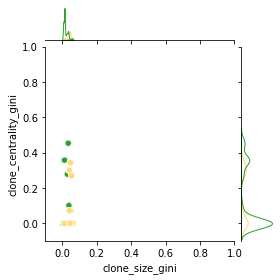

In [21]:
ax = sns.jointplot(y='clone_centrality_gini', x = "clone_size_gini", hue = 'Status_on_day_collection_summary', palette = col_dict, data = data1, xlim = (-0.1, 1), ylim = (-0.1,1), height = 4, marginal_kws={"alpha":0}, rasterized=True)
ax.ax_joint.get_legend().remove()
plt.savefig('figures/jointplot/control_gini_scatterv1.pdf', dpi = 900)

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


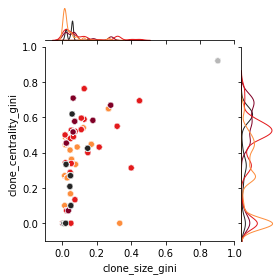

In [22]:
ax = sns.jointplot(y='clone_centrality_gini', x = "clone_size_gini", hue = 'Status_on_day_collection_summary', palette = col_dict, data = data2, xlim =(-0.1, 1), ylim = (-0.1,1), height = 4, marginal_kws={"alpha":0}, rasterized=True)
ax.ax_joint.get_legend().remove()
plt.savefig('figures/jointplot/covid_gini_scatterv1.pdf', dpi = 900)

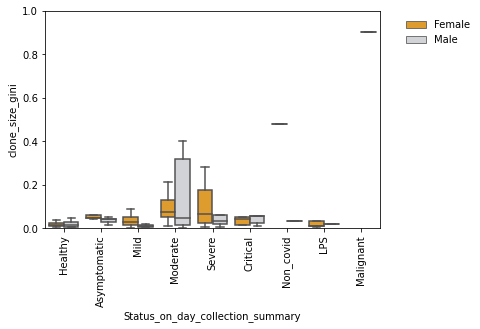

In [23]:
ax = sns.boxplot(y="clone_size_gini", x = 'Status_on_day_collection_summary', data = data, hue = 'Sex', palette = ['#fca311','#d1d3d7'], showfliers=False)
ax.set_ylim((0,1))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False)
plt.savefig('figures/boxplot/clone_size_gini_v2.pdf')

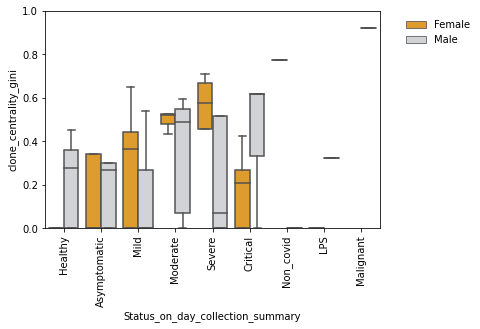

In [24]:
ax = sns.boxplot(y="clone_centrality_gini", x = 'Status_on_day_collection_summary', data = data, hue = 'Sex', palette = ['#fca311','#d1d3d7'], showfliers=False)
ax.set_ylim((0,1))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False)
plt.savefig('figures/boxplot/centrality_gini_v2.pdf')

In [25]:
from scipy import stats
all_t = list()
all_p = list()
for status in ['Healthy','Asymptomatic', 'Mild', 'Moderate','Severe','Critical']:
    sub_df = data[data.Status_on_day_collection_summary == status]
    g1 = sub_df[sub_df['Sex'] == 'Male']['clone_size_gini'].values
    g2 = sub_df[sub_df['Sex'] == 'Female']['clone_size_gini'].values
    _, p = stats.mannwhitneyu(g1, g2)
    t, _ = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

In [26]:
all_t

[0.112061234824428,
 -23.443244655046062,
 -16.561921669477417,
 -2.2544028299854784,
 -21.55640183165568,
 -11.522937248714184]

In [27]:
from dandelion.utilities import bh
import numpy as np

In [28]:
all_p

[1.6616441828402025e-09,
 1.4091093240403993e-121,
 1.0384697004448136e-269,
 7.031910742351499e-84,
 2.0020433192242345e-158,
 2.0866797079851564e-31]

In [29]:
bh(np.array(all_p))

array([1.66164418e-009, 2.81821865e-121, 6.23081820e-269, 1.05478661e-083,
       6.00612996e-158, 2.50401565e-031])

In [30]:
from scipy import stats
all_t = list()
all_p = list()
for status in ['Healthy','Asymptomatic', 'Mild', 'Moderate','Severe','Critical']:
    sub_df = data[data.Status_on_day_collection_summary == status]
    g1 = sub_df[sub_df['Sex'] == 'Male']['clone_centrality_gini'].values
    g2 = sub_df[sub_df['Sex'] == 'Female']['clone_centrality_gini'].values
    _, p = stats.mannwhitneyu(g1, g2)
    t, _ = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

In [31]:
all_t

[44.76450991396118,
 5.377114284804707,
 -35.78429413706548,
 -36.47869218053464,
 -38.41837998098648,
 37.39103640605722]

In [32]:
bh(np.array(all_p))

array([5.65756966e-306, 2.40668838e-001, 1.07690905e-223, 3.66197083e-121,
       8.02408226e-223, 2.85090894e-260])